# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

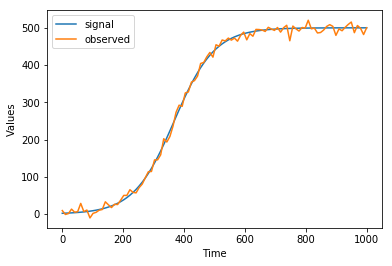

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [8]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

# Do proposals in parallel
sampler.set_parallel(False)

Run the sampler!

In [9]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     3       0:00.0 -inf          1             
0     4       0:00.0 -inf          1             
0     5       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0     241    

c:\users\bclamber\desktop\pints\pints\_log_likelihoods.py:480: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1440  2481    0:01.6 -252.7770022  0.500240269   
1460  2536    0:01.6 -240.901552   0.496722846   
1480  2600    0:01.7 -234.2987658  0.491363636   
1500  2657    0:01.7 -221.9259664  0.487815684537
1520  2697    0:01.8 -215.0150194  0.488027862   
1540  2754    0:01.8 -198.4830079  0.484706882   
1560  2824    0:01.9 -185.6565238  0.478960396   
1580  2891    0:01.9 -178.0761772  0.474106784   
1600  2986    0:02.0 -172.5605404  0.464423821   
1620  3029    0:02.1 -166.9631132  0.464435146   
1640  3064    0:02.1 -159.4454215  0.465840841   
1660  3130    0:02.1 -154.6141725  0.461904762   
1680  3190    0:02.2 -146.5867546  0.459139785   
1700  3246    0:02.3 -141.7265276  0.457132818   
1720  3290    0:02.3 -137.7692725  0.457093426   
1740  3345    0:02.3 -134.5572816  0.455348048   
1760  3387    0:02.4 -131.6673304  0.455641111   
1780  3445    0:02.4 -128.1336355  0.453530378   
1800  3492    0:02.5 -125.9696693  0.453104787   
1820  3536    0:02.5 -123.5581382  0.453125      


4800  8355    0:07.7 -3.472716447  0.553236958   
4820  8387    0:07.7 -3.348483251  0.553524477   
4840  8415    0:07.7 -3.225511454  0.554086089   
4860  8451    0:07.8 -3.106039468  0.554092659297
4880  8484    0:07.8 -2.990746239  0.5543048     
4900  8523    0:07.9 -2.938501416  0.554105626   
4920  8548    0:07.9 -2.827340455  0.554860088   
4940  8574    0:07.9 -2.717642302  0.555541962   
4960  8616    0:08.0 -2.611490191  0.555136319   
4980  8644    0:08.0 -2.508408895  0.555676856   
5000  8676    0:08.1 -2.408502241  0.555944901   
5020  8702    0:08.1 -2.311863871  0.55661286437 
5040  8727    0:08.1 -2.218876163  0.557343581   
5060  8753    0:08.2 -2.12881284   0.558003113   
5080  8797    0:08.2 -2.041416581  0.557460998   
5100  8827    0:08.3 -1.955811301  0.557849769   
5120  8851    0:08.3 -1.873376048  0.558632115   
5140  8878    0:08.3 -1.7940391    0.559212078   
5160  8913    0:08.4 -1.71755711   0.559262305   
5180  8958    0:08.4 -1.644071555  0.558658565   


## Plot posterior samples versus true parameter values (dashed lines)

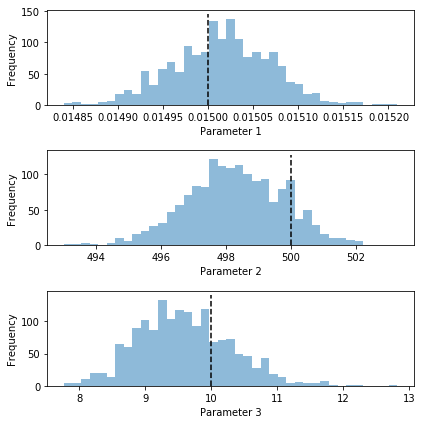

In [10]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

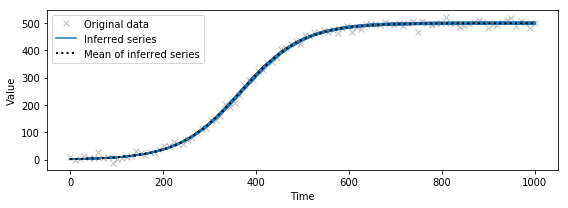

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -377.428659777 ± 0.0793120205802


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1591.26582757
